Saving employees_raw.csv to employees_raw (2).csv


/tmp/ipython-input-7-3714471455.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna('Unknown', inplace=True)
/tmp/ipython-input-7-3714471455.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

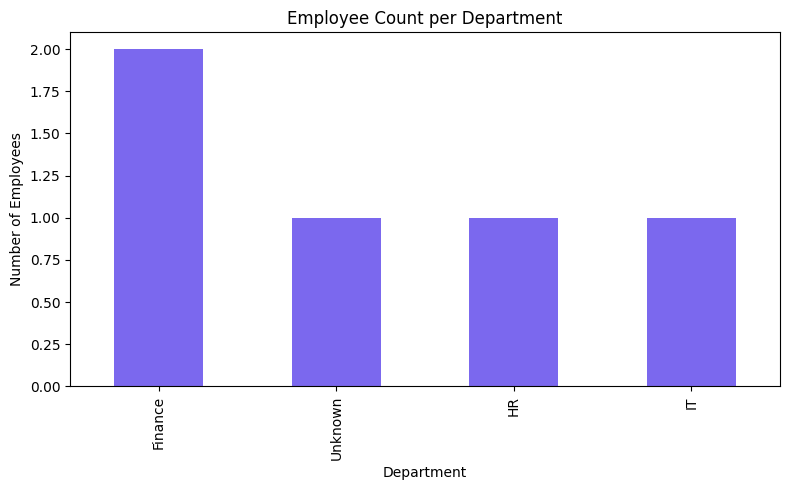

In [7]:
# Task 1: Data Visualization using Pandas and Matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Upload CSV file
from google.colab import files
uploaded = files.upload()

# Step 2: Read the uploaded CSV file
df = pd.read_csv("employees_raw.csv")

# Step 3: Clean column names (remove spaces, etc.)
df.columns = [col.strip() for col in df.columns]

# Step 4: Drop duplicate rows
df.drop_duplicates(inplace=True)

# Step 5: Drop duplicate 'Age.1' column if exists
if 'Age.1' in df.columns:
    df.drop(columns=['Age.1'], inplace=True)

# Step 6: Handle missing values
if 'Department' in df.columns:
    df['Department'].fillna('Unknown', inplace=True)
if 'Salary' in df.columns:
    df['Salary'].fillna(df['Salary'].mean(), inplace=True)
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

# Step 7: Convert JoinDate if exists
if 'JoinDate' in df.columns:
    df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')

# Step 8: Save the cleaned data
df.to_csv("cleaned_data.csv", index=False)

# Step 9: Plot Bar Chart of Department-wise count
if 'Department' in df.columns:
    plt.figure(figsize=(8, 5))
    df['Department'].value_counts().plot(kind='bar', color='mediumslateblue')
    plt.title("Employee Count per Department")
    plt.xlabel("Department")
    plt.ylabel("Number of Employees")
    plt.tight_layout()
    plt.savefig("output_plot.png")  # Save image
    plt.show()
else:
    print("⚠️ 'Department' column not found in data.")



